In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import pandas_profiling as pp

In [2]:
def hash_value_mapper(value):
    if(value == '#VALUE!'):
       return 'NaN';
    elif(value[-1] == '%'):
       return float(value[:-1]);
    return float(value);

def string_to_int_mapper(value):
    return int(value);

In [3]:
retention_data = pd.read_csv('./data/retention/insurance_cust_retention.csv',
                             converters = {'Actual Change in Price vs last Year': hash_value_mapper,
                                          '% Change in Price vs last Year': hash_value_mapper,
                                          'Grouped Change in Price': hash_value_mapper,
                                          'Years of Tenure with Current Provider': string_to_int_mapper}
                            );
retention_data.rename(columns = {'Marital Status':'Marital_Status', 'Car Value':'Car_Value', 'AGE':'Age',
                                 'Years of No Claims Bonus':'Years_of_No_Claims_Bonus', 
                                 'Annual Mileage':'Annual_Mileage', 'Payment Method':'Payment_Method', 
                                 'Acquisition Channel':'Acquisition_Channel', 
                                 'Years of Tenure with Current Provider':'Years_of_Tenure_with_Current_Provider',
                                 'Actual Change in Price vs last Year':'Actual_Change_in_Price_vs_last_Year',
                                 '% Change in Price vs last Year':'percent_Change_in_Price_vs_last_Year',
                                 'Grouped Change in Price':'Grouped_Change_in_Price', 'Renewed?':'Renewed'},
                     inplace=True);

<span style='color:blue'>**Cast columns to floating point numbers**</span>

In [4]:
retention_data.Actual_Change_in_Price_vs_last_Year = retention_data.Actual_Change_in_Price_vs_last_Year.astype('float64');
retention_data.percent_Change_in_Price_vs_last_Year = retention_data.percent_Change_in_Price_vs_last_Year.astype('float64');
retention_data.Grouped_Change_in_Price = retention_data.Grouped_Change_in_Price.astype('float64');

In [5]:
retention_data.head()

,Marital_Status,Age,Gender,Car_Value,Years_of_No_Claims_Bonus,Annual_Mileage,Payment_Method,Acquisition_Channel,Years_of_Tenure_with_Current_Provider,Price,Actual_Change_in_Price_vs_last_Year,percent_Change_in_Price_vs_last_Year,Grouped_Change_in_Price,Renewed
0,M,45,F,500,4,6000,Monthly,Inbound,4,289.4,-11.94,-3.96,-0.05,0
1,M,40,M,3000,8,6000,Monthly,Inbound,4,170.4,45.62,37.00,0.35,1
2,S,25,F,4000,4,4000,Monthly,Inbound,4,466.1,-123.15,-21.00,-0.20,1
3,M,42,M,1800,9,10000,Annual,Inbound,4,245.1,2.34,1.00,0.00,1
4,M,59,M,5000,9,3000,Annual,Inbound,4,240.5,42.56,22.00,0.20,0


In [6]:
retention_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20020 entries, 0 to 20019
Data columns (total 14 columns):
Marital_Status                           20020 non-null object
Age                                      20020 non-null int64
Gender                                   20020 non-null object
Car_Value                                20020 non-null int64
Years_of_No_Claims_Bonus                 20020 non-null int64
Annual_Mileage                           20020 non-null int64
Payment_Method                           20020 non-null object
Acquisition_Channel                      20020 non-null object
Years_of_Tenure_with_Current_Provider    20020 non-null int64
Price                                    20017 non-null float64
Actual_Change_in_Price_vs_last_Year      20017 non-null float64
percent_Change_in_Price_vs_last_Year     20017 non-null float64
Grouped_Change_in_Price                  20017 non-null float64
Renewed                                  20020 non-null int64
dtypes: flo

***

## Missing value treatment

In [6]:
#replace NaN with mean
retention_data.Actual_Change_in_Price_vs_last_Year.fillna(value = retention_data.Actual_Change_in_Price_vs_last_Year.mean(), 
                                                          inplace=True);
retention_data.Grouped_Change_in_Price.fillna(value = retention_data.Grouped_Change_in_Price.mean(), 
                            inplace=True);
retention_data.percent_Change_in_Price_vs_last_Year.fillna(value = retention_data.percent_Change_in_Price_vs_last_Year.mean(), 
                            inplace=True);
retention_data.Price.fillna(value = retention_data.Price.mean(), 
                            inplace=True)

***

## Split data into numerical and categorical features

In [7]:
retention_numerical = retention_data.select_dtypes(['int64', 'float64']);
retention_categorical = retention_data.select_dtypes(['object']);

In [8]:
retention_categorical.head()

,Marital_Status,Gender,Payment_Method,Acquisition_Channel
0,M,F,Monthly,Inbound
1,M,M,Monthly,Inbound
2,S,F,Monthly,Inbound
3,M,M,Annual,Inbound
4,M,M,Annual,Inbound


### Process numerical features

In [10]:
retention_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20020.0,44.744555,12.680561,17.00,36.00,44.000,52.0000,89.00
Car_Value,20020.0,3686.924126,3981.033913,0.00,1000.00,2500.000,5000.0000,60000.00
Years_of_No_Claims_Bonus,20020.0,5.757143,2.894185,0.00,3.00,6.000,9.0000,9.00
Annual_Mileage,20020.0,6528.061239,3585.303675,1.00,4000.00,5200.000,9000.0000,70000.00
Years_of_Tenure_with_Current_Provider,20020.0,2.479620,0.853137,1.00,2.00,2.000,3.0000,4.00
Price,20020.0,422.485702,262.405063,96.00,264.20,357.300,501.6250,4449.90
Actual_Change_in_Price_vs_last_Year,20020.0,16.630885,411.036698,-20576.48,-21.89,15.555,58.8325,36974.28
percent_Change_in_Price_vs_last_Year,20020.0,12.208675,320.482642,-3866.00,-6.00,5.000,21.0000,44140.00
Grouped_Change_in_Price,20020.0,0.121934,3.204866,-38.65,-0.05,0.050,0.2000,441.40
Renewed,20020.0,0.621329,0.485068,0.00,0.00,1.000,1.0000,1.00


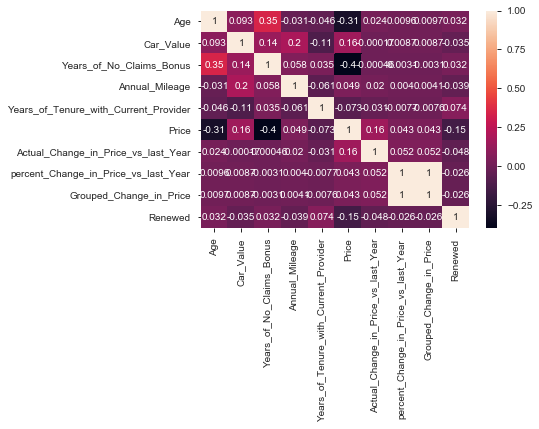

In [12]:
sns.heatmap(retention_numerical.corr(), annot=True);

<span style='color:red'>We observe high correlation between __percent_Change_in_Price_vs_last_Year__ and __Grouped_Change_in_Price__. We will drop __percent_Change_in_Price_vs_last_Year__ from retention_numerical.</span>

In [13]:
retention_numerical.drop(columns = 'percent_Change_in_Price_vs_last_Year', inplace=True);
retention_data.drop(columns = 'percent_Change_in_Price_vs_last_Year', inplace=True);

***

***

## Exploration

In [14]:
# for (Marital_Status, Gender), sub_df in retention_categorical.groupby(['Marital_Status', 'Gender']):
#     print('Population: {0}, \t\t Marital Status: {1}, \t\t Gender: {2}'.format(sub_df.Gender.count(), Marital_Status, Gender));

In [15]:
renewed_labels = [];
renewed_data = [];

for(renewed), sub_df in retention_data.groupby('Renewed'):
    renewed_data.append(sub_df.Renewed.count());
    renewed_labels.append('Renewed' if renewed == 1 else 'Not Renewed');
    print(renewed, sub_df.Renewed.count())

0 7581
1 12439


In [16]:
gender_labels = [];
gender_data = [];

for(gender), sub_df in retention_data.groupby('Gender'):
    gender_data.append(sub_df.Gender.count());
    gender_labels.append('Male' if gender == 'M' else 'Female' if gender =='F' else gender);
    print(gender, sub_df.Gender.count())

C 20
F 9056
M 10944


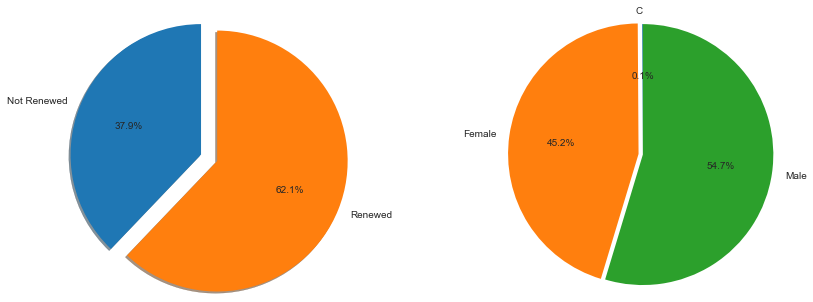

In [18]:
fig, axs = plt.subplots(1,2)
plt.subplots_adjust(right= 2)
axs[0].pie(renewed_data, labels=renewed_labels, autopct='%1.1f%%', explode=[0, 0.2], radius = 1.5,
        shadow=True, startangle=90);
axs[1].pie(gender_data, labels=gender_labels, autopct='%1.1f%%', explode=[0, 0.05, 0], radius = 1.5,
        shadow=False, startangle=90);



***

<u><b>Marital status vs Renewal rate</b></u>

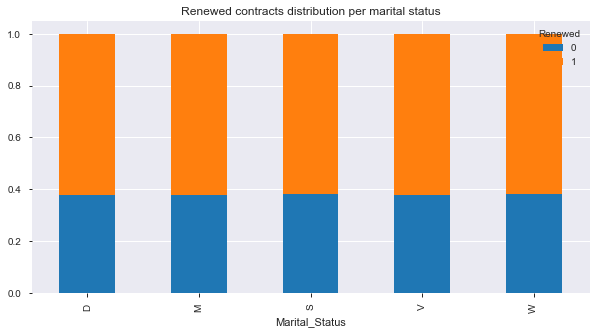

In [19]:
props = retention_data.groupby('Marital_Status')['Renewed'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked=True, legend='bottom left', 
           title = 'Renewed contracts distribution per marital status', 
           figsize = (10,5));

<span style='color:red'>**Conclusion:** </span>
<span style='color:green'>**Renewal rate is irrelavant of the Marital Status**</span>

***

<u><b>Gender vs Renewal rate</b></u>

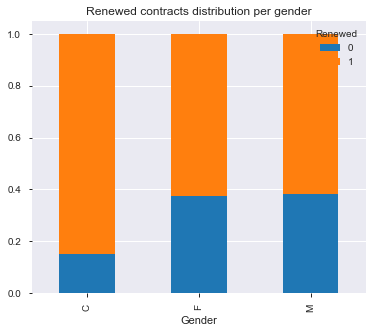

In [20]:
props = retention_data.groupby('Gender')['Renewed'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked=True, legend='bottom left', 
           title = 'Renewed contracts distribution per gender', 
           figsize = (6,5));

<span style='color:red'>**Conclusion:** </span>
<span style='color:green'>**Renewal rate is irrelavant of the Gender.**</span>

***

<u><b>Renewal rate w.r.t. to Gender and Marital Status</b></u>

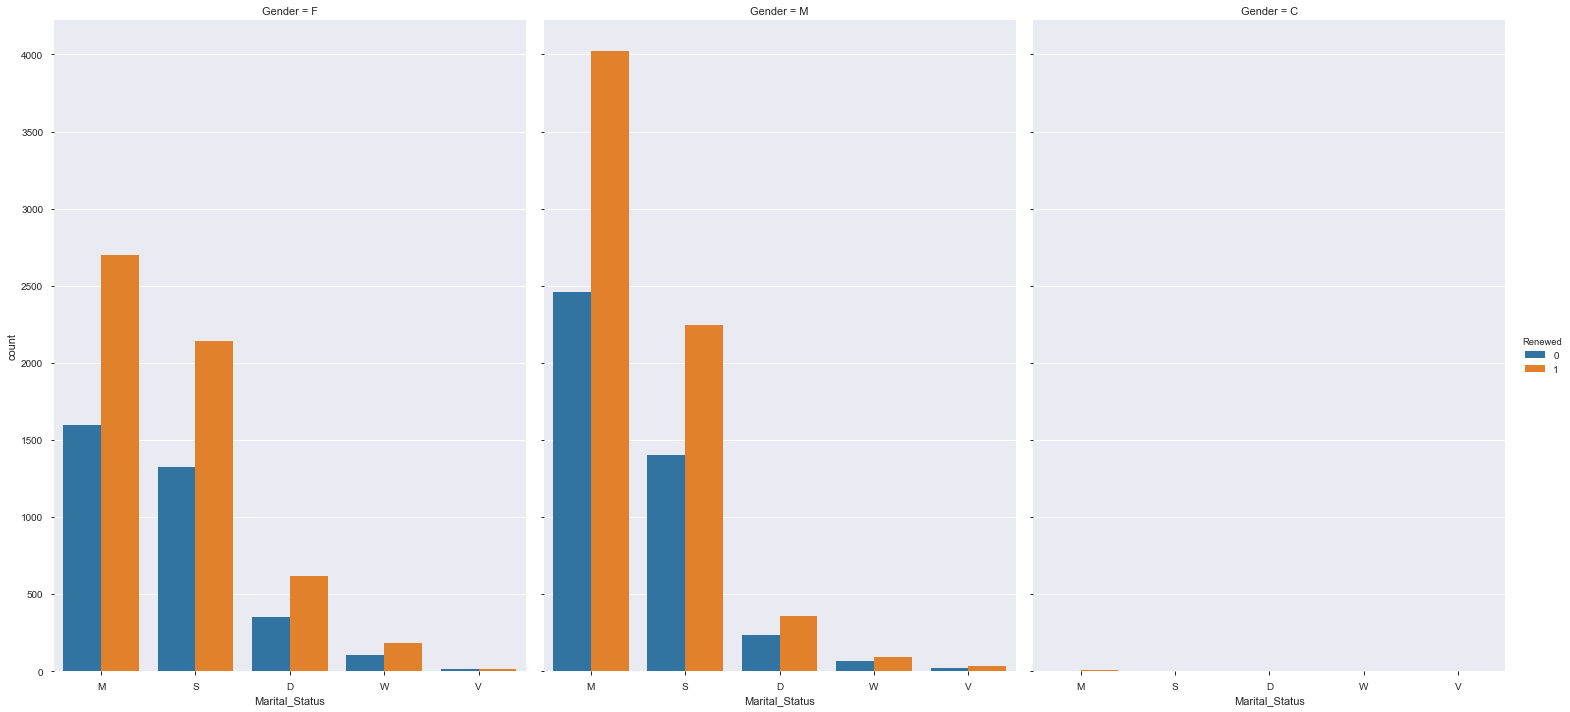

In [19]:
sns.catplot("Marital_Status", col="Gender", data=retention_data, kind="count",size=10, aspect=0.7, hue='Renewed');

***

<u><b>Payment method vs Renewal rate</b></u>

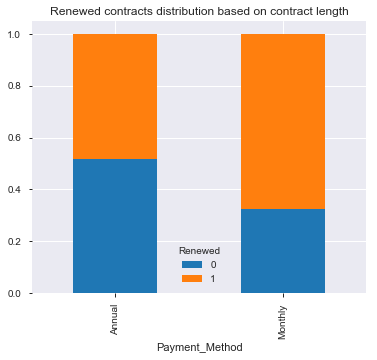

In [22]:
props = retention_data.groupby('Payment_Method')['Renewed'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked=True, legend='bottom left', 
           title = 'Renewed contracts distribution based on contract length', 
           figsize = (6,5));

<span style='color:green'>**Around 74% of monthly contracts are renewed.**</span><span style='color:red'> **vs. only ~50% of annual contracts.**</span>

***

<u><b>Acquisition channel vs Renewal rate</b></u>

**Apendix**
> **Outbound:** company approaches customers using their customer care center etc.  
  **Inbound:** customer finds company through social media, search, etc.  
  **Direct:** company sells directly to customers on their website.  
  **Aggregators:** comparison sites.


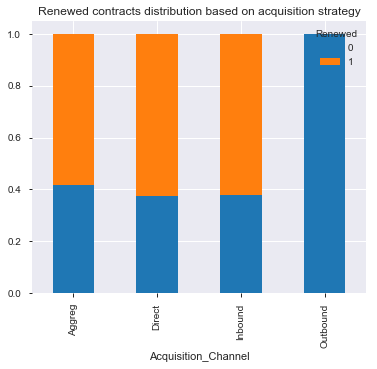

In [25]:
props = retention_data.groupby('Acquisition_Channel')['Renewed'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked=True, legend='bottom left', 
           title = 'Renewed contracts distribution based on acquisition strategy', 
           figsize = (6,5));

<span style='color:red'> 
    **The <u>Outbound acquisition</u> method is not effective.<br> 
    The renewal rate in this case is 0%. <br>
    The company should redefine Outbound acquisition strategy.**
</span>

***

## One Hot Encoding

In [26]:
retention_data_complete = pd.get_dummies(retention_data);
retention_data_complete.head()

,Age,Car_Value,Years_of_No_Claims_Bonus,Annual_Mileage,Years_of_Tenure_with_Current_Provider,Price,Actual_Change_in_Price_vs_last_Year,Grouped_Change_in_Price,Renewed,Marital_Status_D,...,Marital_Status_W,Gender_C,Gender_F,Gender_M,Payment_Method_Annual,Payment_Method_Monthly,Acquisition_Channel_Aggreg,Acquisition_Channel_Direct,Acquisition_Channel_Inbound,Acquisition_Channel_Outbound
0,45,500,4,6000,4,289.4,-11.94,-0.05,0,0,...,0,0,1,0,0,1,0,0,1,0
1,40,3000,8,6000,4,170.4,45.62,0.35,1,0,...,0,0,0,1,0,1,0,0,1,0
2,25,4000,4,4000,4,466.1,-123.15,-0.20,1,0,...,0,0,1,0,0,1,0,0,1,0
3,42,1800,9,10000,4,245.1,2.34,0.00,1,0,...,0,0,0,1,1,0,0,0,1,0
4,59,5000,9,3000,4,240.5,42.56,0.20,0,0,...,0,0,0,1,1,0,0,0,1,0


In [340]:
# pp.ProfileReport(retention_data_complete)